# Data Analysis

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
!pip install plotnine
from plotnine import *

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
!pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


First, we will load our csv data file as a data frame.

In [3]:
df = pd.read_csv('textract_dataframe.csv')
df = df[df['hand'] != 'ambidextrous']
df.sort_values('score',ascending=False).tail(20)

,Unnamed: 0,id,score,avg_conf,text,wid,agegroup,gender,hand,thirdgrade_usa,thirdgrade_usa_region,s1_dae,s1_time,s2_dae,s2_time,s3_dae,s3_time
43,43,w0002_s02_pWOZ_r03,0.348485,71.899376,woz,2,41-60,male,right,True,midwest,0.0,latemorning,53.0,latemorning,98.0,earlyafternoon
685,685,w0031_s03_pLND_r01,0.340909,75.645901,london,31,41-60,male,right,True,midwest,0.0,lateevening,22.0,earlyevening,43.0,lateevening
686,686,w0031_s03_pLND_r02,0.340909,72.338259,london,31,41-60,male,right,True,midwest,0.0,lateevening,22.0,earlyevening,43.0,lateevening
46,46,w0002_s03_pLND_r03,0.340909,75.567414,london,2,41-60,male,right,True,midwest,0.0,latemorning,53.0,latemorning,98.0,earlyafternoon
37,37,w0002_s02_pLND_r03,0.329545,71.936110,london,2,41-60,male,right,True,midwest,0.0,latemorning,53.0,latemorning,98.0,earlyafternoon
683,683,w0031_s02_pWOZ_r02,0.318182,72.237393,woz,31,41-60,male,right,True,midwest,0.0,lateevening,22.0,earlyevening,43.0,lateevening
684,684,w0031_s02_pWOZ_r03,0.287879,69.881338,woz,31,41-60,male,right,True,midwest,0.0,lateevening,22.0,earlyevening,43.0,lateevening
675,675,w0031_s01_pWOZ_r03,0.287879,69.067671,woz,31,41-60,male,right,True,midwest,0.0,lateevening,22.0,earlyevening,43.0,lateevening
680,680,w0031_s02_pPHR_r02,0.285714,77.674636,phrase,31,41-60,male,right,True,midwest,0.0,lateevening,22.0,earlyevening,43.0,lateevening
40,40,w0002_s02_pPHR_r03,0.285714,84.568628,phrase,2,41-60,male,right,True,midwest,0.0,latemorning,53.0,latemorning,98.0,earlyafternoon


Both `score` and `avg_conf` are measures of Textract's accuracy, so we will look into each variable in order to determine which one to use in our analysis.

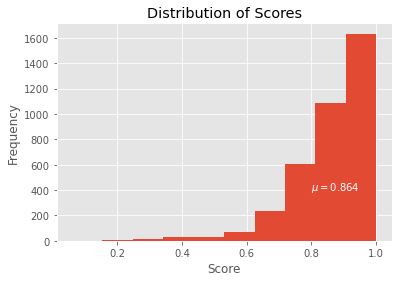

In [4]:
x = df['score'].mean()

plt.style.use('ggplot')
plt.hist(df['score'])
plt.title('Distribution of Scores')
plt.text(0.8, 400, f'$\mu={round(x,3)}$',fontdict={'color':'white','size':10})
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

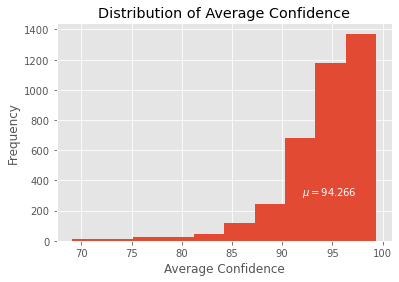

In [5]:
y = df['avg_conf'].mean()

plt.style.use('ggplot')
plt.hist(df['avg_conf'])
plt.title('Distribution of Average Confidence')
plt.text(92, 300, f'$\mu={round(y,3)}$',fontdict={'color':'white','size':10})
plt.xlabel('Average Confidence')
plt.ylabel('Frequency')
plt.show()

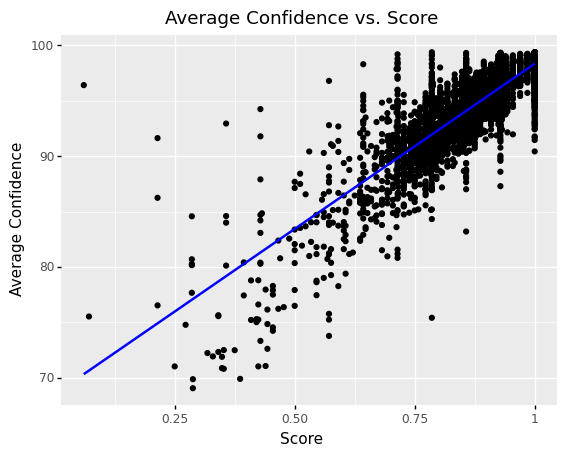

<ggplot: (8738241181858)>

In [6]:
gg = ggplot(df, aes(x="score", y="avg_conf"))
gg2 = gg + geom_point()
gg3 = gg2 + geom_smooth(colour="blue", method="lm", se=False)
gg4 = gg3 + labs(title="Average Confidence vs. Score", y="Average Confidence", x="Score")
gg4

The two variables have similar distributions, and a relatively strong linear correlation, so it will likely not make a difference which measure we choose. Therefore, we have decided to use `score` as our outcome variable to look at the accuracy of Textract.

## Analysis

### Summary Statistics 

Before performing multiple linear regression on our results, we decided to look at the some of our findings.

First, analyzing average scores for individuals of different dominant hands.

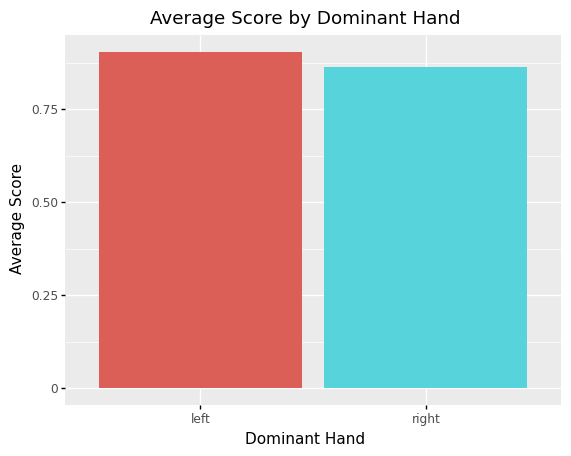

<ggplot: (8738240571775)>

In [7]:
hand_data = df.groupby('hand').score.mean()
handdata=pd.DataFrame(hand_data)
handdata.index.name = 'Hand'
handdata.reset_index(inplace=True)

hd = ggplot(handdata, aes(x="Hand", y="score"))
hd2 = hd + geom_bar(aes(fill="Hand"), stat="identity", position="dodge", show_legend=False)
hd3 = hd2 + labs(title = "Average Score by Dominant Hand", x="Dominant Hand", y="Average Score")
hd3

Our findings are interesting. First, samples by left handed writers produced a higher average accuracy score than those who were right handed. Ambidextrous writers produced samples with a lot lower accuracy than either right or left handed writers. This result surprised us because ambidextrous writers might easily be thought to be more skilled than those who are not; but potentially they are less skilled *with either hand* than an individual with a sole dominant hand. Regardless, further testing will address whether these scores are significant.

Next, we look at gender differences in Textract accuracy scoring.

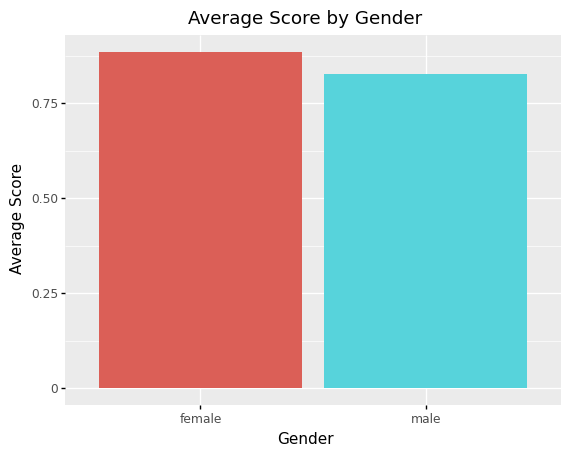

<ggplot: (-9223363298616395355)>

In [8]:
gender_data = df.groupby('gender').score.mean()
genderdata=pd.DataFrame(gender_data)
genderdata.index.name = 'Gender'
genderdata.reset_index(inplace=True)
gd = ggplot(genderdata, aes(x="Gender", y="score"))
gd2 = gd + geom_bar(aes(fill="Gender"), stat="identity", position="dodge", show_legend=False)
gd3 = gd2 + labs(title="Average Score by Gender", x="Gender", y="Average Score")
gd3

Female sample writers produced samples that were 6% more accurate on average. This suggests that females have better, or at least more readable, handwriting than males. Social differences in expectations for males and females when in school made this result not terribly surprising to us. This variable will be tested later through regression. 

We also show the combined relationship between hand and gender below:

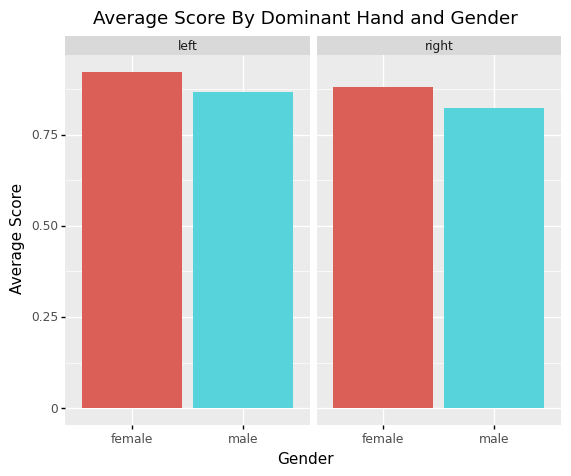

<ggplot: (-9223363298616426296)>

In [9]:
gender_hand = df.groupby(["gender", "hand"]).score.mean()
#Manually make dataframe to graph both variables
data = {'gender':['female', 'female', 'male', 'male'], 'hand':['left', 'right', 'left', 'right'], 'score':[0.920930, 0.881422, 0.867040, 0.823770]}
genderhand = pd.DataFrame(data)

gh = ggplot(genderhand, aes(x="gender", y="score"))
gh2 = gh + geom_bar(aes(fill="gender"), stat="identity", position = "dodge", show_legend=False)
gh3 = gh2 + facet_wrap("hand")
gh4 = gh3 + labs(title="Average Score By Dominant Hand and Gender", y="Average Score", x="Gender")
gh4

The final major variable that we chose to explore was the age group/category. Below we show its average scores. As we expected, we find that younger age groups have higher scores whereas older age groups have markedly lower accuracy scores. This may reflect our earlier hypothesis that older communities may have worse handwriting, which would, as a result, be more difficult for Textract to process.

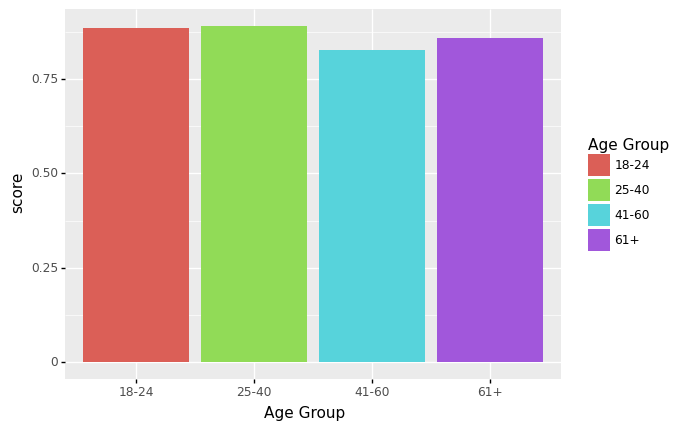

<ggplot: (8738238340577)>

In [10]:
age_data = df[['agegroup','score']]
age_data1 = age_data[age_data.agegroup != "nan"]
agedata=age_data1.groupby('agegroup').score.mean()
agedata1=pd.DataFrame(agedata)
agedata1.index.name = 'Age Group'
agedata1.reset_index(inplace=True)
a1 = ggplot(agedata1, aes(x="Age Group", y="score"))
a2 = a1 + geom_bar(aes(fill="Age Group"), stat="identity", position="dodge")
a2

### Regression

To analyze the effect of variables such as age, gender, and dominant hand on Textract's accuracy for the handwriting samples, we devised some multiple linear regression models (MLRM) which are specified as follows:

Model 1: $$score_i = \beta_0 + \beta_1male + u_i $$
Model 2: $$score_i = \beta_0 + \beta_1male + \beta_2right hand + u_i $$
Model 3: $$score_i = \beta_0 + \beta_1male + \beta_2right hand + \beta_3age(25-40) + \beta_4age(41-60) + \beta_5age(61+) + u_i $$ 

*Note: Female, left hand, and age(18-24) were chosen as our reference groups for the dummy variables gender, dominant hand, and age, respectively. 

Here, we explicitly study the effect of these variables on score, which is a direct measure of Textract's accuracy. Through our modeling, we start with simply the gender dummy variable and progressively add more to see if our findings change as more differences in writers are accounted for (which can statsitically only improve the confidence of our findings). 

Our null statistical hypothesis is that none of the variables in our model have a serious effect on Textract's accuracy,

To test our hypothesis, we use the F-test for statistical inference, constructed in the following way for Model 3 in particular, as it is our most comprehensive test:

$$ H_0: \beta_1 =\text{ ... }= \beta_6 = 0 $$
$$H_A: H_0 \text{ is untrue} $$

Therefore, if we reject our null hypothesis at a = 0.05 we will have uncovered that at least one variable that affects Textract's transcription accuracy. 

Before actually running our regression, we must first motivate a regression approach within our current data set. In other words, to show that our regression model is valid and is the best linear unbiased estimator, we must first satisfy the 5 Gauss Markov Assumptions:

1. The form is linear

> Based on our previous construction of each of our models, condition 1 is satisfied because all are linear

2. The data has been randomly selected from the population

> As shown below, we have randomly sampled 1,000 participant entries from the entire dataset

3. The regressors do not display perfect multicollinearity

> The regression results below do not indicate that there are strong multicollinearity problems 

4. The regressors are uncorrelated with the residual term

> The mean of the residuals is 0

5. The variance of the residual term remains constant

> We assume heteroskedasticity in the model and correct for it using a robust linear regression fitting which corrects our  subsequent inference testing

With these conditions satisfied, we know that our inference approach is valid.

In [11]:
df = df.sample(n= 1000, random_state = 53534945)

m1 = smf.ols(formula = 'score ~ gender', data = df).fit(cov_type = 'HC0')
m2 = smf.ols(formula = 'score ~ gender + hand', data = df).fit(cov_type = 'HC0')
m3 = smf.ols(formula = 'score ~ gender + hand + agegroup', data = df).fit(cov_type = 'HC0')
st=Stargazer([m1,m2,m3])
from IPython.core.display import HTML
HTML(st.render_html())

In [12]:
df

,Unnamed: 0,id,score,avg_conf,text,wid,agegroup,gender,hand,thirdgrade_usa,thirdgrade_usa_region,s1_dae,s1_time,s2_dae,s2_time,s3_dae,s3_time
411,411,w0020_s02_pLND_r02,0.818182,90.731628,london,20,61+,female,right,True,midwest,0.0,lateafternoon,41.0,earlyevening,80.0,earlyevening
2108,2108,w0139_s01_pPHR_r01,0.857143,94.675640,phrase,139,61+,male,right,True,west,0.0,lateafternoon,41.0,earlymorning,80.0,lateafternoon
578,578,w0027_s03_pLND_r01,0.761364,91.350390,london,27,41-60,female,right,True,midwest,0.0,earlyafternoon,22.0,earlyafternoon,49.0,latemorning
320,320,w0015_s03_pWOZ_r03,0.939394,96.176732,woz,15,41-60,female,right,True,midwest,0.0,lateevening,39.0,earlymorning,78.0,lateafternoon
2995,3022,w0246_s02_pLND_r01,0.943182,94.744857,london,246,18-24,female,right,True,Midwest,0.0,latemorning,22.0,lateafternoon,84.0,latemorning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,1798,w0125_s02_pLND_r02,0.818182,92.789951,london,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,468,w0023_s02_pPHR_r03,1.000000,97.823708,phrase,23,25-40,female,left,True,midwest,0.0,earlyafternoon,35.0,earlymorning,64.0,latemorning
3636,3663,w0319_s02_pPHR_r03,0.857143,96.914416,phrase,319,25-40,female,right,True,West,0.0,earlyafternoon,34.0,earlymorning,72.0,earlymorning
3675,3702,w0322_s01_pLND_r01,0.875000,91.113756,london,322,25-40,female,right,True,West,0.0,latemorning,70.0,latemorning,148.0,earlymorning


In [16]:
#calculation for 4th assumption above - regressors are uncorrelated with the residual term
df['residuals'] = m3.resid
x = df['residuals'].mean()
x

6.114697309583517e-16

*Model 1*

Across the board we see statistically significant coefficients for gender whether it be the only variable specified, or one of several. This suggests that true differences exist in Textract's accuracy to read handwriting samples by writers of different gender identities. As we predicted that male writers would have worse handwriting that is harder to decipher, this is not totally surprising. 

*Model 2*

When we add an individual's dominant hand as a potentially explanatory variable for score, the coefficients for gender slightly change, and handedness (as well as intercept), possess statistically significant coefficients. We can confidently state that whether an individual is left or right handed impacts Textract's accuracy in deciphering their handwriting. Further, we can see that right handedness decreases Textract's score by -.033 when our base is left handedness.

*Model 3*

Our final model, the most comprehensive, additionally includes age. While gender and dominant hand variables continue to be significant, the age group 25-40 is found to not be statistically significant in predicting score; at least, compared to the base group of 18-24. That said, 41-60 and 60+ did  provide statistically significant coefficients when compared to 18-24. 

In the final MLRM that we specified, we find that every coefficient, except for that on age(25-40) and agegroup(61+), is statistically significantly different from 0 at the 1% level. We also produce an F statistic of 16.612, which demonstrates that each of the regressors in the model are jointly statistically significantly different from 0 at the 1% level. 

This means that age characteristics, as well as the gender and favored hand of a writer, statistically impact Textract's accuracy. In fact, this holds up even at a 99% confidence level! We are very confident that these factors matter. *Why*  an individual's righthandedness leads to lower accuracy remains unanswered, but this finding in and of itself is very interesting. 

Therefore, we reject our null hypothesis that $$\beta_1 =\text{ ... }= \beta_6 = 0 $$ at the 5% level, in favor of the alternative. In other words, **we can be reasonably certain that the variables we have chosen affect Textract's accuracy**. 

### ANOVA

In [17]:
sm.stats.anova_lm(m3, typ = 2)

,sum_sq,df,F,PR(>F)
gender,0.563667,1.0,44.919826,3.464033e-11
hand,0.160596,1.0,12.798239,3.639701e-04
agegroup,0.663506,3.0,17.625408,3.788269e-11
Residual,12.259669,977.0,NaN,NaN
